##Libraries
import numpy as np
import seaborn as sns 
import pandas as pd

In [2]:
##Add Dataset
sales=pd.read_csv('supermarket_sales.csv')

In [3]:
ds=sales.copy()

In [11]:
ds.groupby(["Gender"])["Total"].mean()

Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64

## Which product type is more profitable?

<Axes: xlabel='gross income', ylabel='Product line'>

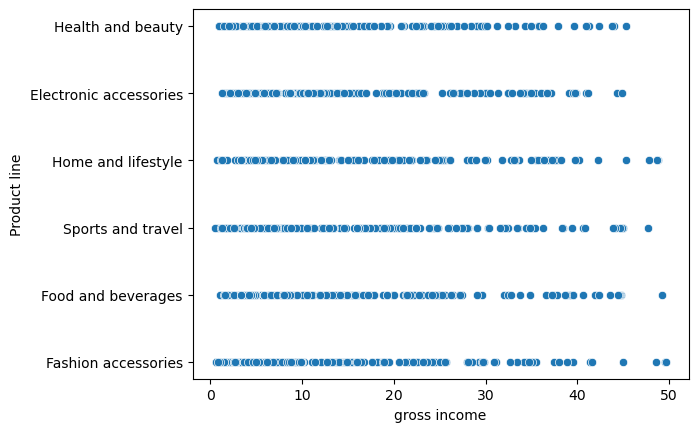

In [25]:
sns.scatterplot(x="gross income",y="Product line",data=ds)